Euclidean Distance Accuracy: 0.9767
Manhattan Distance Accuracy: 0.9800
Difference (Euclidean - Manhattan): -0.0033


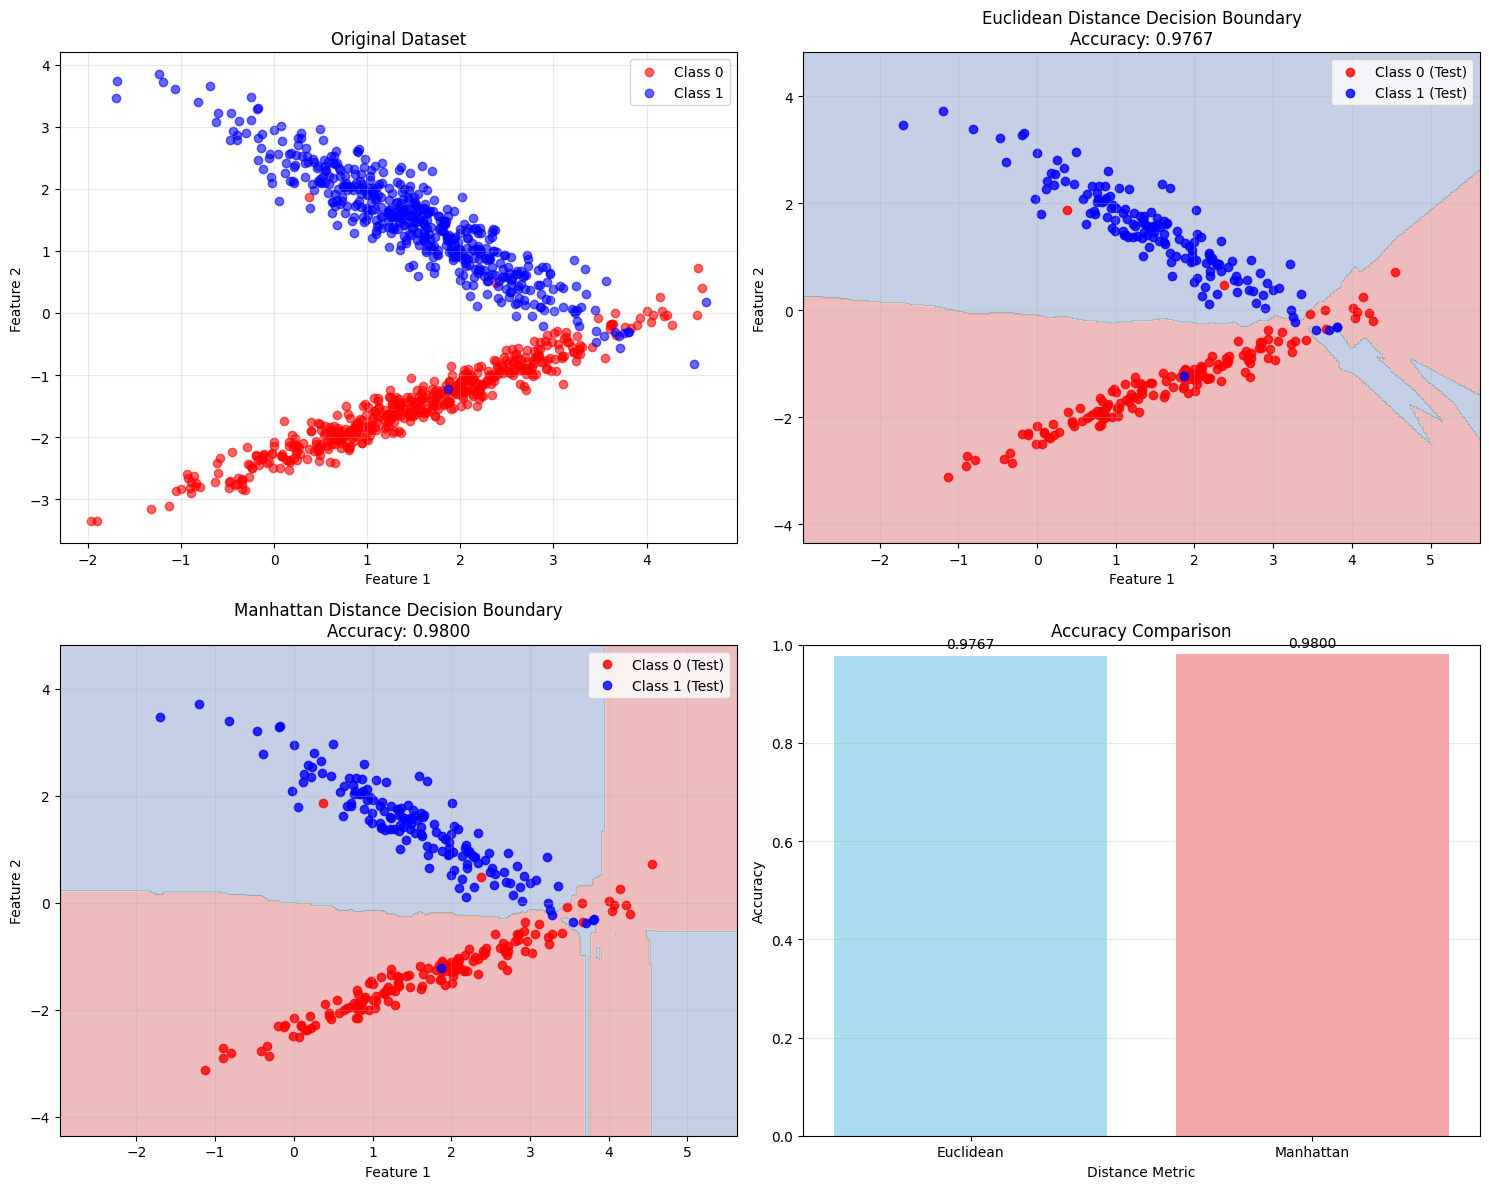

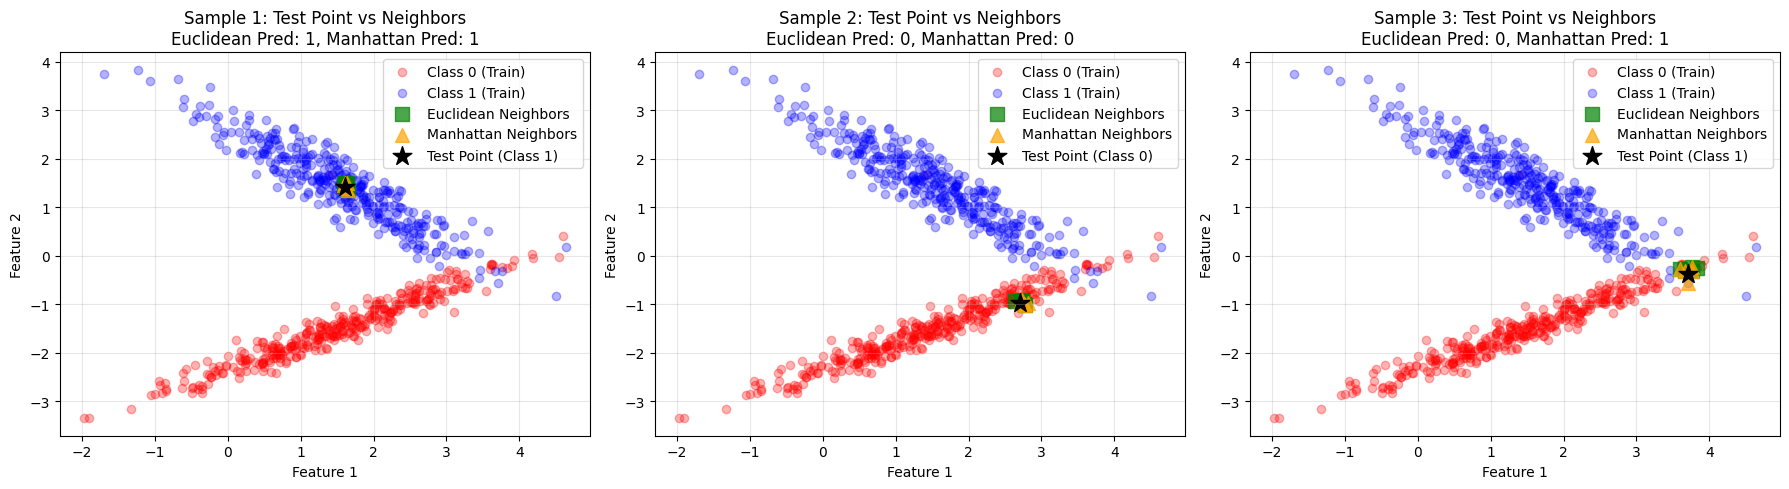


SUMMARY
Dataset size: 1000 samples, 2 features
Test set size: 300 samples
Euclidean Accuracy: 0.9767 (97.67%)
Manhattan Accuracy: 0.9800 (98.00%)
Accuracy Difference: 0.0033
Better metric: Manhattan


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Create KNN classifiers with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train both classifiers
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

# Make predictions
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

# Calculate accuracies
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Euclidean Distance Accuracy: {acc_euclidean:.4f}")
print(f"Manhattan Distance Accuracy: {acc_manhattan:.4f}")
print(f"Difference (Euclidean - Manhattan): {acc_euclidean - acc_manhattan:.4f}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original dataset
axes[0, 0].scatter(X[y == 0, 0], X[y == 0, 1], c='red', alpha=0.6, label='Class 0')
axes[0, 0].scatter(X[y == 1, 0], X[y == 1, 1], c='blue', alpha=0.6, label='Class 1')
axes[0, 0].set_title('Original Dataset')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Euclidean distance decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z_euclidean = knn_euclidean.predict(np.c_[xx.ravel(), yy.ravel()])
Z_euclidean = Z_euclidean.reshape(xx.shape)

axes[0, 1].contourf(xx, yy, Z_euclidean, alpha=0.3, cmap=plt.cm.RdYlBu)
axes[0, 1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
                  c='red', alpha=0.8, label='Class 0 (Test)')
axes[0, 1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
                  c='blue', alpha=0.8, label='Class 1 (Test)')
axes[0, 1].set_title(f'Euclidean Distance Decision Boundary\nAccuracy: {acc_euclidean:.4f}')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Manhattan distance decision boundary
Z_manhattan = knn_manhattan.predict(np.c_[xx.ravel(), yy.ravel()])
Z_manhattan = Z_manhattan.reshape(xx.shape)

axes[1, 0].contourf(xx, yy, Z_manhattan, alpha=0.3, cmap=plt.cm.RdYlBu)
axes[1, 0].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
                  c='red', alpha=0.8, label='Class 0 (Test)')
axes[1, 0].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
                  c='blue', alpha=0.8, label='Class 1 (Test)')
axes[1, 0].set_title(f'Manhattan Distance Decision Boundary\nAccuracy: {acc_manhattan:.4f}')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Accuracy comparison
metrics = ['Euclidean', 'Manhattan']
accuracies = [acc_euclidean, acc_manhattan]
colors = ['skyblue', 'lightcoral']

bars = axes[1, 1].bar(metrics, accuracies, color=colors, alpha=0.7)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_title('Accuracy Comparison')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_xlabel('Distance Metric')

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                    f'{acc:.4f}', ha='center', va='bottom')

axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Additional visualization: Distance calculation examples
# Select a few test points and show distance calculations
sample_indices = np.random.choice(len(X_test), 3, replace=False)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (ax, sample_idx) in enumerate(zip(axes, sample_indices)):
    test_point = X_test[sample_idx]
    true_label = y_test[sample_idx]
    
    # Calculate distances to all training points
    euclidean_dists = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
    manhattan_dists = np.sum(np.abs(X_train - test_point), axis=1)
    
    # Get the k nearest neighbors (k=5)
    k = 5
    euclidean_neighbors = np.argsort(euclidean_dists)[:k]
    manhattan_neighbors = np.argsort(manhattan_dists)[:k]
    
    # Plot
    ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
              c='red', alpha=0.3, label='Class 0 (Train)')
    ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
              c='blue', alpha=0.3, label='Class 1 (Train)')
    
    # Highlight Euclidean neighbors
    ax.scatter(X_train[euclidean_neighbors, 0], X_train[euclidean_neighbors, 1], 
              c='green', s=100, alpha=0.7, marker='s', label='Euclidean Neighbors')
    
    # Highlight Manhattan neighbors  
    ax.scatter(X_train[manhattan_neighbors, 0], X_train[manhattan_neighbors, 1], 
              c='orange', s=100, alpha=0.7, marker='^', label='Manhattan Neighbors')
    
    # Plot test point
    ax.scatter(test_point[0], test_point[1], c='black', s=200, marker='*', 
              label=f'Test Point (Class {true_label})')
    
    ax.set_title(f'Sample {idx+1}: Test Point vs Neighbors\n'
                f'Euclidean Pred: {y_pred_euclidean[sample_idx]}, '
                f'Manhattan Pred: {y_pred_manhattan[sample_idx]}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Dataset size: {len(X)} samples, {X.shape[1]} features")
print(f"Test set size: {len(X_test)} samples")
print(f"Euclidean Accuracy: {acc_euclidean:.4f} ({acc_euclidean*100:.2f}%)")
print(f"Manhattan Accuracy: {acc_manhattan:.4f} ({acc_manhattan*100:.2f}%)")
print(f"Accuracy Difference: {abs(acc_euclidean - acc_manhattan):.4f}")
print(f"Better metric: {'Euclidean' if acc_euclidean > acc_manhattan else 'Manhattan'}")